<a href="https://colab.research.google.com/github/nishadavi96/Sparks-Foundation-Tasks/blob/main/Task_6%3Edecision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Nishad Chinchwadkar

#Task #6> Decision Tree Classifier

## Importing the libraries

In [1]:
!pip install dtreeviz


     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 204.2MB 29kB/s 
     |████████████████████████████████| 204kB 45.4MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=d95df0b88f9b7add5683ae600a98f45cf47e5fc9fe18be50bab6c7f6d90c469d
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=314861a4e8c0f2aa5fe200c1e4cc46b3b5e6fe2dc4cae87a976203f2e21c184d
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import sklearn.datasets as datasets
import sklearn.metrics as metrics


## Importing the dataset

In [80]:
iris=datasets.load_iris()

In [82]:
X = pd.DataFrame(iris.data,columns=iris.feature_names)

In [84]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [85]:
y = iris.target

In [86]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#Take Care Of Missing Data

In [87]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [89]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Splitting the dataset into the Training set and Test set

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [91]:
print(y_train)

[1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2
 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0
 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


In [92]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
100                6.3               3.3                6.0               2.5
40                 5.0               3.5                1.3               0.3
86                 6.7               3.1                4.7               1.5
76                 6.8               2.8                4.8               1.4
71                 6.1               2.8                4.0               1.3
134                6.1               2.6                5.6               1.4
51                 6.4               3.2                4.5     

In [93]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]


## Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
print(X_train)

[[-0.31699245 -1.33490866  0.07470002 -0.13206311]
 [ 2.06897222 -0.15774053  1.2920336   1.40653626]
 [ 0.47832911  0.54856035  0.51736677  0.50901996]
 [-0.43060981 -1.57034229  0.01936667 -0.13206311]
 [ 0.47832911 -0.86404141  0.62803346  0.76545319]
 [ 0.47832911 -0.62860778  0.73870015  0.38080334]
 [-1.11231401 -1.33490866  0.40670008  0.63723657]
 [ 0.47832911 -1.33490866  0.68336681  0.8936698 ]
 [ 1.27365067  0.31312672  0.51736677  0.25258673]
 [ 0.70556384 -0.15774053  0.7940335   1.02188642]
 [ 0.13747701  0.78399398  0.40670008  0.50901996]
 [-1.22593137  0.0776931  -1.19796691 -1.28601264]
 [-0.08975772 -0.86404141  0.73870015  0.8936698 ]
 [-0.31699245 -0.86404141  0.24070005  0.12437012]
 [-0.31699245 -0.39317416 -0.09130002  0.12437012]
 [-0.43060981 -1.33490866  0.13003336  0.12437012]
 [ 0.25109438 -0.15774053  0.46203343  0.25258673]
 [ 1.5008854   0.31312672  1.23670026  0.76545319]
 [-0.65784455  1.49029486 -1.25330026 -1.28601264]
 [-1.7940182  -0.15774053 -1.47

In [96]:
print(X_test)

[[-0.08975772 -0.62860778  0.73870015  1.53475287]
 [ 0.13747701 -2.04120955  0.13003336 -0.26027973]
 [-0.43060981  2.66746299 -1.3086336  -1.28601264]
 [ 1.61450276 -0.39317416  1.40270029  0.76545319]
 [-0.99869664  0.78399398 -1.25330026 -1.28601264]
 [ 0.47832911  0.54856035  1.23670026  1.66296949]
 [-0.99869664  1.0194276  -1.36396695 -1.15779603]
 [ 0.93279857  0.0776931   0.51736677  0.38080334]
 [ 1.04641594 -0.62860778  0.57270012  0.25258673]
 [ 0.25109438 -0.62860778  0.13003336  0.12437012]
 [ 0.25109438 -1.09947504  1.01536688  0.25258673]
 [ 0.59194647  0.31312672  0.40670008  0.38080334]
 [ 0.25109438 -0.62860778  0.51736677 -0.0038465 ]
 [ 0.70556384 -0.62860778  0.46203343  0.38080334]
 [ 0.25109438 -0.39317416  0.51736677  0.25258673]
 [-1.11231401  1.25486123 -1.3086336  -1.41422926]
 [ 0.13747701 -0.39317416  0.40670008  0.38080334]
 [-0.43060981 -1.09947504  0.35136674 -0.0038465 ]
 [-1.22593137 -0.15774053 -1.3086336  -1.15779603]
 [-0.54422718  1.96116211 -1.36

## Training the Decision Tree Classification model on the Training set

In [97]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting the Test set results

In [98]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]]


#Visualizing The Decision Tree Classifier

In [99]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(classifier, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


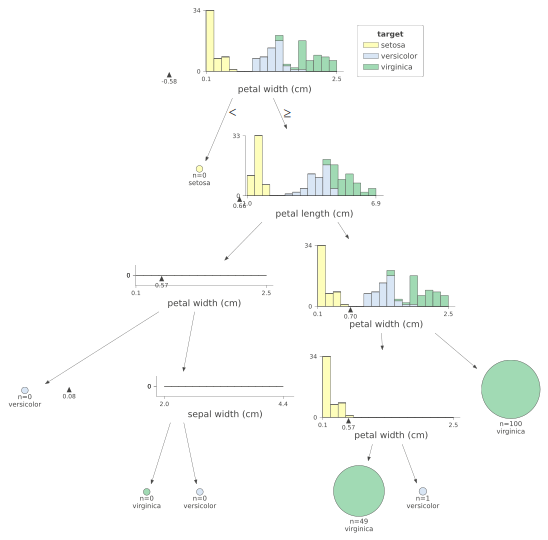

In [100]:
viz

#Measuring Accuracy Score

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.98

#This means that Model is 98% accurate!!

#Thank You